In [1]:
using CLOUD
sequence_path = [
    "results/advection_DGMulti_p9M2l1_20220622_215551/",
    "results/advection_DGMulti_p9M2l0_20220622_215551/"]
n = length(sequence_path)
analysis_path = [new_path(string(sequence_path[i],"refinement_analysis/")) 
    for i in 1:n]
(conservation_law, spatial_discretization, 
    initial_data, form, tspan, strategy) = load_project(
        string(sequence_path[1],"grid_1/"));

┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/tristanmontoya/.julia/packages/PyPlot/XaELc/src/init.jl:118


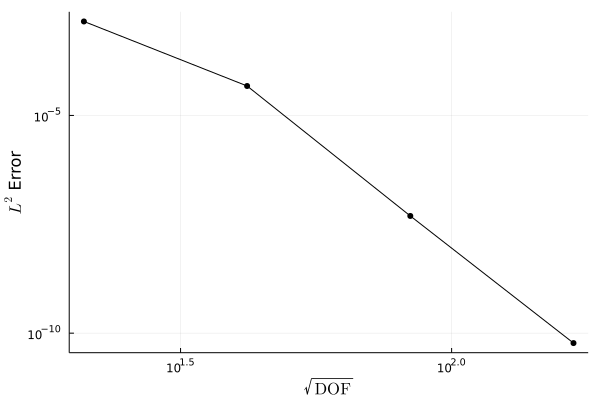

In [2]:
refinement_analysis = [RefinementAnalysis(initial_data, sequence_path[i], 
    analysis_path[i]) for i in 1:n]
refinement_results = [analyze(refinement_analysis[i], 4) for i in 1:n]
plot_analysis(refinement_analysis[1], refinement_results[1])

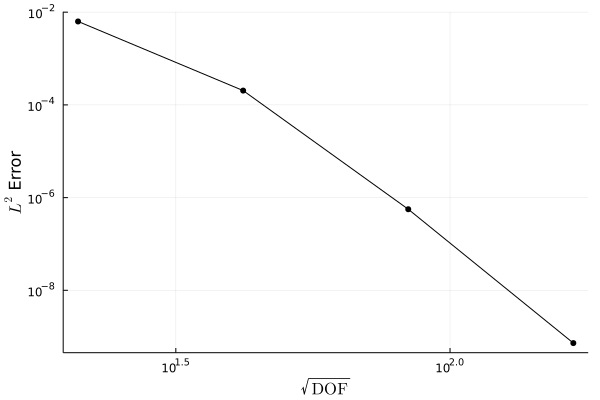

In [3]:
plot_analysis(refinement_analysis[2], refinement_results[2])

In [4]:
tabulate_analysis_for_paper((refinement_results[1],refinement_results[2]))

\begin{table}
  \begin{tabular}{rrrrrrrrr}
    \toprule
    \textbf{$N_e$} & \textbf{Conservation Metric} &  & \textbf{Energy Metric} &  & \textbf{$L^2$ Error} &  & \textbf{Order} &  \\\midrule
    & 8 & -8.859e-15 & -1.245e-14 & -1.498e-05 & 5.288e-06 & 1.441e-03 & 6.297e-03 &  &  \\
    & 32 & -1.615e-14 & -1.894e-14 & -2.497e-08 & 9.624e-09 & 4.746e-05 & 2.032e-04 & 4.92 & 4.95 \\
    & 128 & 5.784e-14 & 5.878e-14 & -1.835e-13 & -2.266e-14 & 4.915e-08 & 5.612e-07 & 9.92 & 8.50 \\
    & 512 & 1.929e-13 & 1.940e-13 & -1.723e-13 & -1.704e-13 & 5.912e-11 & 7.283e-10 & 9.70 & 9.59 \\\bottomrule
  \end{tabular}
\end{table}
